In [42]:
import pandas as pd
import country_converter as coco
import numpy as np
import os
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

# pip install country_converter --upgrade
country_numeric  = [4, 8, 10, 12, 16, 20, 24, 28, 31, 32, 36, 40, 44, 48, 50, 51, 52, 56, 60, 64, 68, 70, 72, 74, 76, 84, 86, 90, 92, 96, 100, 104, 108, 112, 116, 120, 124, 132, 136, 140, 144, 148, 152, 156, 158, 162, 166, 170, 174, 175, 178, 180, 184, 188, 191, 192, 196, 203, 204, 208, 212, 214, 218, 222, 226, 231, 232, 233, 234, 238, 239, 242, 246, 248, 250, 254, 258, 260, 262, 266, 268, 270, 275, 276, 288, 292, 296, 300, 304, 308, 312, 316, 320, 324, 328, 332, 334, 336, 340, 344, 348, 352, 356, 360, 364, 368, 372, 376, 380, 384, 388, 392, 398, 400, 404, 408, 410, 414, 417, 418, 422, 426, 428, 430, 434, 438, 440, 442, 446, 450, 454, 458, 462, 466, 470, 474, 478, 480, 484, 492, 496, 498, 499, 500, 504, 508, 512, 516, 520, 524, 528, 531, 533, 534, 535, 540, 548, 554, 558, 562, 566, 570, 574, 578, 580, 581, 583, 584, 585, 586, 591, 598, 600, 604, 608, 612, 616, 620, 624, 626, 630, 634, 638, 642, 643, 646, 652, 654, 659, 660, 662, 663, 666, 670, 674, 678, 682, 686, 688, 690, 694, 702, 703, 704, 705, 706, 710, 716, 724, 728, 729, 732, 740, 744, 748, 752, 756, 760, 762, 764, 768, 772, 776, 780, 784, 788, 792, 795, 796, 798, 800, 804, 807, 818, 826, 831, 832, 833, 834, 840, 850, 854, 858, 860, 862, 876, 882, 887, 894]
country_iso3 = ['AFG', 'ALB', 'ATA', 'DZA', 'ASM', 'AND', 'AGO', 'ATG', 'AZE', 'ARG', 'AUS', 'AUT', 'BHS', 'BHR', 'BGD', 'ARM', 'BRB', 'BEL', 'BMU', 'BTN', 'BOL', 'BIH', 'BWA', 'BVT', 'BRA', 'BLZ', 'IOT', 'SLB', 'VGB', 'BRN', 'BGR', 'MMR', 'BDI', 'BLR', 'KHM', 'CMR', 'CAN', 'CPV', 'CYM', 'CAF', 'LKA', 'TCD', 'CHL', 'CHN', 'TWN', 'CXR', 'CCK', 'COL', 'COM', 'MYT', 'COG', 'COD', 'COK', 'CRI', 'HRV', 'CUB', 'CYP', 'CZE', 'BEN', 'DNK', 'DMA', 'DOM', 'ECU', 'SLV', 'GNQ', 'ETH', 'ERI', 'EST', 'FRO', 'FLK', 'SGS', 'FJI', 'FIN', 'ALA', 'FRA', 'GUF', 'PYF', 'ATF', 'DJI', 'GAB', 'GEO', 'GMB', 'PSE', 'DEU', 'GHA', 'GIB', 'KIR', 'GRC', 'GRL', 'GRD', 'GLP', 'GUM', 'GTM', 'GIN', 'GUY', 'HTI', 'HMD', 'VAT', 'HND', 'HKG', 'HUN', 'ISL', 'IND', 'IDN', 'IRN', 'IRQ', 'IRL', 'ISR', 'ITA', 'CIV', 'JAM', 'JPN', 'KAZ', 'JOR', 'KEN', 'PRK', 'KOR', 'KWT', 'KGZ', 'LAO', 'LBN', 'LSO', 'LVA', 'LBR', 'LBY', 'LIE', 'LTU', 'LUX', 'MAC', 'MDG', 'MWI', 'MYS', 'MDV', 'MLI', 'MLT', 'MTQ', 'MRT', 'MUS', 'MEX', 'MCO', 'MNG', 'MDA', 'MNE', 'MSR', 'MAR', 'MOZ', 'OMN', 'NAM', 'NRU', 'NPL', 'NLD', 'CUW', 'ABW', 'SXM', 'BES', 'NCL', 'VUT', 'NZL', 'NIC', 'NER', 'NGA', 'NIU', 'NFK', 'NOR', 'MNP', 'UMI', 'FSM', 'MHL', 'PLW', 'PAK', 'PAN', 'PNG', 'PRY', 'PER', 'PHL', 'PCN', 'POL', 'PRT', 'GNB', 'TLS', 'PRI', 'QAT', 'REU', 'ROU', 'RUS', 'RWA', 'BLM', 'SHN', 'KNA', 'AIA', 'LCA', 'MAF', 'SPM', 'VCT', 'SMR', 'STP', 'SAU', 'SEN', 'SRB', 'SYC', 'SLE', 'SGP', 'SVK', 'VNM', 'SVN', 'SOM', 'ZAF', 'ZWE', 'ESP', 'SSD', 'SDN', 'ESH', 'SUR', 'SJM', 'SWZ', 'SWE', 'CHE', 'SYR', 'TJK', 'THA', 'TGO', 'TKL', 'TON', 'TTO', 'ARE', 'TUN', 'TUR', 'TKM', 'TCA', 'TUV', 'UGA', 'UKR', 'MKD', 'EGY', 'GBR', 'GGY', 'JEY', 'IMN', 'TZA', 'USA', 'VIR', 'BFA', 'URY', 'UZB', 'VEN', 'WLF', 'WSM', 'YEM', 'ZMB']
country_names_url = "https://raw.githubusercontent.com/MariaStefaniak/SurvivalAtBirth_Global/refs/heads/main/Data_Organization/CSV_Uploads/Rockford/CountryNames.csv"


In [43]:
# Put in the raw url of the csv you want to use
url = "https://raw.githubusercontent.com/MariaStefaniak/SurvivalAtBirth_Global/refs/heads/main/Data_Organization/Compiled_CSVs/Cluster_Practice_Clean.csv"
og_df = pd.read_csv(url, index_col = 0)
og_df.head()

,Births_per_woman_2019,Population_Density_2010,GDP_per_capita_2022,beds_per_1000,Maternal_mortality_ratio _2019
AFG,4.870,52.719133,1357.9878,0.34,644
ALB,1.414,116.970803,12978.1010,2.91,5
ARE,1.334,89.856459,77203.6700,1.94,9
ARG,1.994,14.766744,18292.3180,3.20,33
ARM,1.575,108.567416,13837.5770,4.59,25


In [44]:
og_df.columns

Index(['Births_per_woman_2019', 'Population_Density_2010',
       'GDP_per_capita_2022', 'beds_per_1000',
       'Maternal_mortality_ratio _2019'],
      dtype='object')

In [45]:
# Select which columns you want to use for clustering. Can be select by integer location or name
column_choices = [0,2,3]
og_df.iloc[:,column_choices].head()

,Births_per_woman_2019,GDP_per_capita_2022,beds_per_1000
AFG,4.870,1357.9878,0.34
ALB,1.414,12978.1010,2.91
ARE,1.334,77203.6700,1.94
ARG,1.994,18292.3180,3.20
ARM,1.575,13837.5770,4.59


In [46]:
# Create new dataframe of subset (not necessary. Just for ease of writing things later)
# Normalize the data, i.e. mean zero and std = 1 by column
df = og_df.iloc[:,column_choices]
df = df.apply(lambda x: (x-x.mean())/ x.std(), axis = 0)
df

,Births_per_woman_2019,GDP_per_capita_2022,beds_per_1000
AFG,2.459193,-1.137293,-1.303415
ALB,-0.781199,-0.543727,-0.160803
ARE,-0.856208,2.736972,-0.592061
ARG,-0.237383,-0.272272,-0.031870
ARM,-0.630243,-0.499824,0.586118
...,...,...,...
UKR,-0.955595,-0.810829,1.328594
URY,-0.657434,-0.175748,-0.347533
USA,-0.507416,1.780932,-0.236384
UZB,0.504269,-0.565115,0.670592


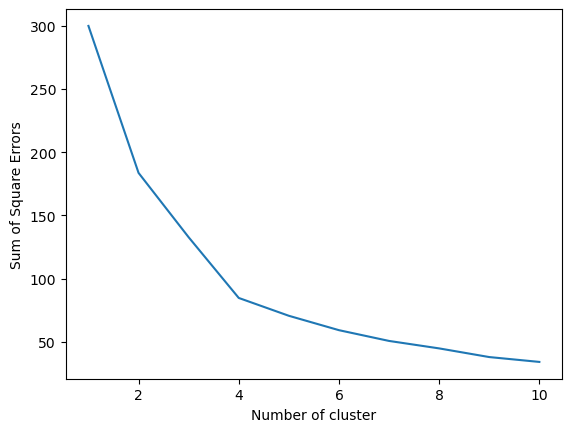

In [47]:
# Do KMeans clustering for range of clusters, and then plot the mean square error

cluster_range = 10
# Randomly selected seed so results don't change on rerun
seed = 3425
loss = [0] * cluster_range
for ii in range(cluster_range):
    kmeans = KMeans(n_clusters = ii + 1, random_state = seed, n_init=10)
    kmeans.fit_predict(df.values)
    loss[ii] = kmeans.inertia_
    
plt.figure()
plt.plot(range(1, cluster_range + 1), loss)
plt.xlabel("Number of cluster")
plt.ylabel("Sum of Square Errors")
plt.show()


In [48]:
# Choose cluster number. Typically chosen by grabbing the "elbow" from the above plot
# Prints out the cluster categorization, and then a list of lists where each country is put in its category
cluster_choice = 4
kmeans = KMeans(n_clusters = cluster_choice, random_state = seed, n_init=10).fit_predict(df.values)
country_list = [[og_df.iloc[ii].name for ii in range(len(kmeans)) if kmeans[ii] == jj] for jj in range(cluster_choice)]
print(kmeans)
print(country_list)


[0 1 3 1 2 2 2 0 0 2 1 1 2 1 3 3 1 2 1 1 1 2 2 3 1 1 1 3 2 3 2 3 2 0 1 1 2
 1 2 1 1 3 3 1 3 1 1 2 2 1 3 1 1 1 2 3 2 1 2 1 2 0 0 0 1 3 3 1 3 3 1 1 1 2
 2 1 2 2 0 3 0 3 1 2 2 2 3 1 1 1 1 1 1 1 1 0 2 1 3 1 1]
[['AFG', 'BEN', 'BFA', 'GMB', 'MOZ', 'MRT', 'NER', 'RWA', 'SEN', 'TZA'], ['ALB', 'ARG', 'BOL', 'BRA', 'BWA', 'CHL', 'COL', 'CRI', 'CUB', 'DOM', 'ECU', 'EGY', 'GTM', 'HND', 'HTI', 'IDN', 'IND', 'ISR', 'JAM', 'JOR', 'KGZ', 'LAO', 'LBN', 'LKA', 'MAR', 'MNE', 'NIC', 'NPL', 'PAN', 'PER', 'PHL', 'PRY', 'SLV', 'SYC', 'SYR', 'THA', 'TJK', 'TKM', 'TTO', 'TUN', 'TUR', 'URY', 'UZB', 'VEN'], ['ARM', 'AUT', 'BEL', 'BGR', 'BRB', 'CHN', 'CZE', 'DEU', 'EST', 'FRA', 'GEO', 'HRV', 'HUN', 'JPN', 'KAZ', 'LTU', 'LVA', 'MKD', 'MNG', 'POL', 'PRT', 'ROU', 'RUS', 'SRB', 'SVK', 'SVN', 'UKR'], ['ARE', 'CAN', 'CHE', 'DNK', 'ESP', 'FIN', 'GBR', 'IRL', 'ISL', 'ITA', 'KWT', 'LUX', 'NLD', 'NOR', 'NZL', 'OMN', 'SAU', 'SGP', 'SWE', 'USA']]


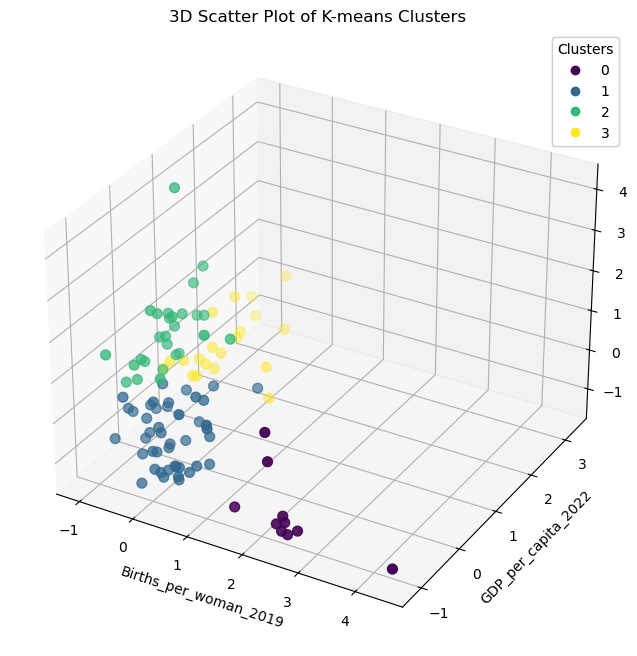

In [ ]:
# If exactly two columns were chosen, then we can plot the data in a pretty way
# If exactly three columns were chosen, then we can plot the data in a less pretty way, but I haven't written this yet
if len(column_choices) == 2:
    kmeans = KMeans(n_clusters= cluster_choice, random_state=seed, n_init=10)
    y_kmeans = kmeans.fit_predict(df)
    # Plot the clusters
    plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=y_kmeans, s=50, cmap='viridis')

    # Plot the centroids
    centers = kmeans.cluster_centers_
    plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')

    plt.title('K-means Clustering')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

elif len(column_choices) == 3:
    kmeans = KMeans(n_clusters=cluster_choice, random_state=seed, n_init=10)
    df['cluster'] = kmeans.fit_predict(df)

    # 3D scatter plot
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Scatter plot with different colors for each cluster
    scatter = ax.scatter(df.iloc[:,0], df.iloc[:,1], df.iloc[:,2], c=df['cluster'], cmap='viridis', s=50)

    # Still want to add in option to plot centroids

    # Add labels and title
    ax.set_xlabel(df.columns[0])
    ax.set_ylabel(df.columns[1])
    ax.set_zlabel(df.columns[2])
    ax.set_title('3D Scatter Plot of K-means Clusters')

    # Add a legend
    legend = ax.legend(*scatter.legend_elements(), title='Clusters')
    ax.add_artist(legend)

    plt.show()
